Importing Libraries

In [27]:

import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import svm
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Define the constants and initial conditions

In [140]:
# Parameters

length = 1.0  # Length of the rod
time_end = 600  # End time
num_points = 100 # Number of spatial points
num_steps = 1000  # Number of time steps
L_fusion = 3.98e5 # J/kg
k = 190 # W/m-K
# Material properties
rho = 2700  # Density of aluminum (kg/m^3)
cp = 880  # Specific heat of aluminum (J/kg-K)
alpha = k/(rho*cp)  # Thermal diffusivity
T_L =  650 # Liquidius Temperature
T_S = 620 # Solidus Temperature

Defining the simulation field and initilisation of the temperatures

In [141]:
# Spatial and time discretisation
dx = length / (num_points - 1)
dt = time_end / num_steps




Solving the heat transfer equation and phase change using numerical methods

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([ 0.        , -0.66666667, -0.66666667, -0.66666667, -0.66666667,
       -0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
       -0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
       -0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
       -0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
       -0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
       -0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
       -0.66666667, -0.66666667, -0.66666667, -0.66

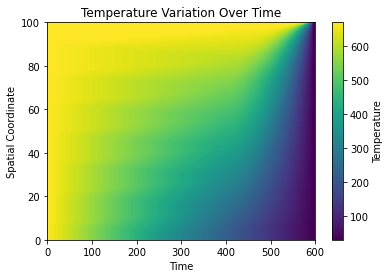

In [143]:
# Plot temperature variation using imshow
plt.imshow(temperature_history, aspect='auto', extent=[min(time_steps), max(time_steps), 0, num_points])
plt.colorbar(label='Temperature')
plt.xlabel('Time')
plt.ylabel('Spatial Coordinate')
plt.title('Temperature Variation Over Time')
plt.show()

c:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:701: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

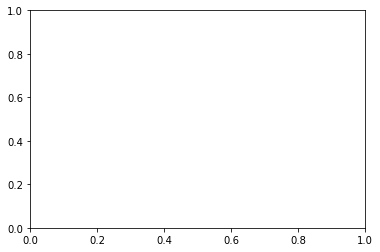

In [138]:
# Plot phase variation using imshow

plt.imshow(phi_history, aspect='auto', extent=[min(time_steps), max(time_steps), 0, num_points])
plt.colorbar(label='Phase')
plt.xlabel('Time')
plt.ylabel('Spatial Coordinate')
plt.title('Phase Variation Over Time')
plt.show()

Plotting the solutions

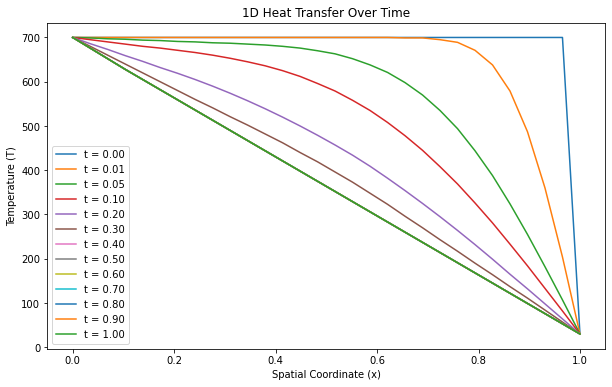

In [36]:
plot_points = [0, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Plot the results
plt.figure(figsize=(10, 6))
# Plot spatial variation at different time steps
for i in plot_points:
    plt.plot(np.linspace(0, length, num_points), temperature_history[i], label=f"t = {time_steps[i]:.2f}")

plt.xlabel('Spatial Coordinate (x)')
plt.ylabel('Temperature (T)')
plt.title('1D Heat Transfer Over Time')
plt.legend()
plt.show()

In [ ]:
# Save data to CSV file
csv_filename = 'heat_transfer_data_with_time.csv'

with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Spatial Coordinate (x)', *time_steps])
    csv_writer.writerows(np.column_stack((np.linspace(0, length, num_points), *temperature_history)))

print(f'Data saved to {csv_filename}')

Data saved to heat_transfer_data_with_time.csv


Machine Learning of the solidification 

Support Vector Regression is employed to train the model to predict the temperature
Data preparation

Extract the features and the target data

In [ ]:
raw_data =  pd.read_csv('heat_transfer_data_with_time.csv') #Read the data
#print(raw_data.head)

X1 = raw_data['Spatial Coordinate (x)'].values # Get the spatial coordinate values
print(len(X1))
X2 = np.arange(0,time_end +dt,dt) # Get the time values
print(len(X2))
#y = np.zeros(len(X1)*len(X2))
#print(len(y))

y_data = raw_data.iloc[0:,1:].values.ravel()    # Get the temperature values
#y = y_data.flatten()
print(y_data)


ftr = list(itertools.product(X1,X2)) #  Get the spatial and time coordinate values
feature = np.array(ftr) # Convert to numpy array

X_train, X_test, y_train, y_test = train_test_split(feature, y_data, test_size=0.2, random_state=42)




30
1001
[100. 100. 100. ... 600. 600. 600.]


Training of SVR

In [ ]:
svr_rbf = svm.SVR(kernel="rbf", C=2000, gamma=100, epsilon=0.1)  # epsilon is the margin of deviation from the regression curve

svr_rbf.fit(X_train, y_train)




RMSE: 3.107459
RMSE2: 5.360803


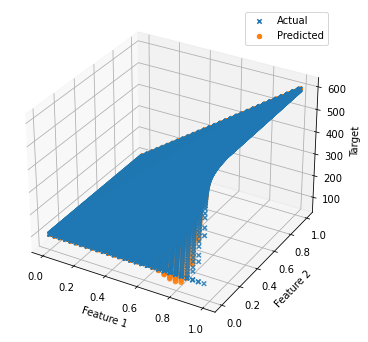

In [ ]:
y_pred = svr_rbf.predict(feature)
rmse = np.sqrt(mean_squared_error(y_data, y_pred))

y_pred2 = svr_rbf.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print("RMSE: %f" % (rmse))
print("RMSE2: %f" % (rmse2))
# Visualization (for 2D data)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(feature[:, 0], feature[:, 1], y_data, label='Actual', marker='x')
ax.scatter(feature[:, 0], feature[:, 1], y_pred, label='Predicted', marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.legend()

plt.show()



PINN training